In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# traning results
% cd /content/drive/MyDrive/American_University/2021_Spring/CSC-676-001 Computer Vision/GitHub/Project/evaluations

/content/drive/MyDrive/American_University/2021_Spring/CSC-676-001 Computer Vision/GitHub/Project/evaluations


# Evaluation Metrics
## 0. read the images
- compare the maximum epoch that I trained: epoch041

In [41]:
from google.colab import files
uploaded = files.upload()

Saving epoch001_img_out.png to epoch001_img_out.png
Saving epoch001_img_truth.png to epoch001_img_truth.png
Saving epoch041_img_out.png to epoch041_img_out.png
Saving epoch041_img_truth.png to epoch041_img_truth.png


In [42]:
import imageio
import matplotlib.pyplot as plt
import cv2
import skimage

epoch041Img1 = imageio.imread("epoch041_img_truth.png")
epoch041Img2 = imageio.imread("epoch041_img_out.png")
epoch001Img1 = imageio.imread("epoch001_img_truth.png")
epoch001Img2 = imageio.imread("epoch001_img_out.png")

(Text(0.5, 1.0, 'epoch001_img_out'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

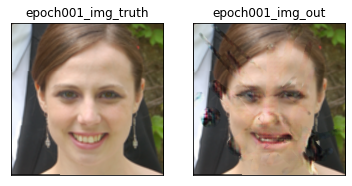

In [43]:
plt.subplot(121),plt.imshow(epoch001Img1)
plt.title('epoch001_img_truth'), plt.xticks([]), plt.yticks([]) # ground turth
plt.subplot(122),plt.imshow(epoch001Img2)
plt.title('epoch001_img_out'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'epoch041_img_out'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

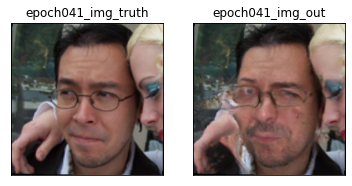

In [44]:
plt.subplot(121),plt.imshow(epoch041Img1)
plt.title('epoch041_img_truth'), plt.xticks([]), plt.yticks([]) # ground turth
plt.subplot(122),plt.imshow(epoch041Img2)
plt.title('epoch041_img_out'), plt.xticks([]), plt.yticks([])

## 1. Structural Similarity Index (SSIM) -  the higher the better

## References:
- https://ourcodeworld.com/articles/read/991/how-to-calculate-the-structural-similarity-index-ssim-between-two-images-with-python 
- https://medium.com/srm-mic/all-about-structural-similarity-index-ssim-theory-code-in-pytorch-6551b455541e 
- https://scikit-image.org/docs/0.12.x/api/skimage.measure.html#skimage.measure.compare_ssim 

In [46]:
# Compute the mean structural similarity index between two images (SSIM).

# epoch 1
epoch001SSIM = skimage.measure.compare_ssim(epoch001Img1, epoch001Img2, multichannel=True)
print(epoch001SSIM)

# epoch 41
epoch041SSIM = skimage.measure.compare_ssim(epoch041Img1, epoch041Img2, multichannel=True)
print(epoch041SSIM)

0.8034113348010727
0.7451380435570387


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  


## 2. Total variation loss (TV loss) - the lower the better

tf.image.total_variation | TensorFlow Core v2.4.1\
`loss = tf.reduce_sum(tf.image.total_variation(images))`

Total variation loss is the sum of the absolute differences for neighboring pixel-values in the input images. This measures how much noise is in the images.

## Reference:
-  https://www.tensorflow.org/api_docs/python/tf/image/total_variation

In [ ]:
# Total variation loss
import torch
import tensorflow as tf

# return the total variation of image
flipped_images = tf.image.random_flip_left_right(tf.convert_to_tensor(epoch041Img2))
loss = tf.reduce_sum(tf.image.total_variation(flipped_images))

print(loss)

# 3. Peak Signal-to-Noise Ratio (PSNR - the higher the better) 

## References
- https://www.geeksforgeeks.org/python-peak-signal-to-noise-ratio-psnr/
- https://dsp.stackexchange.com/questions/38065/peak-signal-to-noise-ratio-psnr-in-python-for-an-image 

In [73]:
# PSNR
import numpy 
import math
import cv2
original = epoch001Img1
contrast = epoch001Img2
def psnr(img1, img2):
  mse = numpy.mean( (img1 - img2) ** 2 )
  if mse == 0:
    return 100
  PIXEL_MAX = 255.0
  return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

depoch001 = psnr(original,contrast)
print(depoch001)

33.319601087691254


In [74]:
# PSNR
import numpy 
import math
import cv2
original = epoch041Img1
contrast = epoch041Img2
def psnr(img1, img2):
  mse = numpy.mean( (img1 - img2) ** 2 )
  if mse == 0:
    return 100
  PIXEL_MAX = 255.0
  return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

depoch041 = psnr(original,contrast)
print(depoch041)

32.20122410945684


Report skeleton


Abstract (5%)

1. Introduction (10%)  
2. Related work (10%)  
3. Approach (and technical correctness) (10%)  
   3.1.  
   3.2.  
4.	Experimental results (and technical correctness) (10%)  
5.	Conclusion (5%)  
6.  References (5%) 


o	Codes, accuracy, reproducibility, and style (20%)   
o	Overall clarity of the report (5%)


Wednesday: 
* 3 scores


Thursday:
* Report
* Submission
* Presentation
